# Data Preparation

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import pickle

df = pd.read_csv(r"E:\DDoS-attack-detection-using-HTTP-packet-clustering-pattern-master\DDoS-attack-detection-using-HTTP-packet-clustering-pattern-master\WP_Dataset\wplogs.csv")
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14469 entries, 0 to 14468
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   @timestamp           14469 non-null  object 
 1   @timestamp.1         14469 non-null  object 
 2   _id                  14469 non-null  object 
 3   bytes                14469 non-null  object 
 4   clientip             14469 non-null  object 
 5   geoip.country_code3  11535 non-null  object 
 6   httpversion          14453 non-null  float64
 7   request              14453 non-null  object 
 8   response             14469 non-null  int64  
 9   useragent.device     14469 non-null  object 
 10  useragent.name       14469 non-null  object 
 11  useragent.os         14469 non-null  object 
 12  verb                 14453 non-null  object 
 13  useragent.os_name    14469 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.5+ MB


# Data Preprocessing 

In [32]:

from sklearn.preprocessing import OneHotEncoder
df['@timestamp'] = pd.to_datetime(df['@timestamp'], format='%b %d, %Y @ %H:%M:%S.%f')
df['@timestamp.1'] = pd.to_datetime(df['@timestamp.1'], format='%b %d, %Y @ %H:%M:%S.%f')


df['@timestamp'] = pd.to_datetime(df['@timestamp'])
df['@timestamp.1'] = pd.to_datetime(df['@timestamp.1'])


df['bytes'] = pd.to_numeric(df['bytes'], errors='ignore')


df.dropna(subset=['httpversion', 'request', 'verb'], inplace=True)


df = df[df['clientip'] != '127.0.0.1']


df['geoip.country_code3'].fillna('unknown', inplace=True)


categorical_cols = ['useragent.device', 'useragent.name', 'useragent.os', 'verb', 'useragent.os_name']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)


df.drop(categorical_cols, axis=1, inplace=True)
df = pd.concat([df, encoded_cols], axis=1)


print(df.head())


            @timestamp        @timestamp.1                   _id    bytes  \
50 2020-06-20 14:45:21 2020-06-20 14:45:21  Dlbk1HIBxLQmqGLLs2PB      410   
52 2020-06-20 14:45:21 2020-06-20 14:45:21  EFbk1HIBxLQmqGLLs2PB   15,003   
70 2020-06-20 14:45:03 2020-06-20 14:45:03  -Vbk1HIBxLQmqGLLs2LB   99,285   
71 2020-06-20 14:45:03 2020-06-20 14:45:03  -lbk1HIBxLQmqGLLs2LB  194,069   
72 2020-06-20 14:45:03 2020-06-20 14:45:03  -1bk1HIBxLQmqGLLs2LB    1,248   

           clientip geoip.country_code3  httpversion  \
50   195.54.160.135             unknown          1.1   
52   195.54.160.135             unknown          1.1   
70  103.224.146.167                  IN          1.1   
71  103.224.146.167                  IN          1.1   
72  103.224.146.167                  IN          1.1   

                                              request  response  \
50  /vendor/phpunit/phpunit/src/Util/PHP/eval-stdi...     301.0   
52  /vendor/phpunit/phpunit/src/Util/PHP/eval-stdi...     404.0   

C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# K-means clustering

C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


             clientip          @timestamp
50     195.54.160.135 2020-06-20 14:45:21
118       1.38.188.50 2020-06-20 14:44:34
119    13.233.254.101 2020-06-20 14:44:34
411    13.233.254.101 2020-06-20 14:26:42
412    13.233.254.101 2020-06-20 14:26:42
...               ...                 ...
14434  66.175.210.166 2020-06-19 15:48:17
14449  51.254.115.242 2020-06-19 15:43:42
14459   142.93.113.16 2020-06-19 15:40:20
14460   142.93.113.16 2020-06-19 15:40:19
14467  13.233.254.101 2020-06-19 15:38:54

[107 rows x 2 columns]
107
IP Address: 1.38.188.50
Timestamps:
  - 2020-06-20 14:44:34

IP Address: 103.75.35.6
Timestamps:
  - 2020-06-19 21:50:19

IP Address: 104.194.136.146
Timestamps:
  - 2020-06-19 16:10:04
  - 2020-06-19 16:10:04
  - 2020-06-19 16:09:58

IP Address: 104.194.136.244
Timestamps:
  - 2020-06-19 16:10:15
  - 2020-06-19 16:10:15
  - 2020-06-19 16:10:15

IP Address: 104.194.152.149
Timestamps:
  - 2020-06-19 16:10:23
  - 2020-06-19 16:10:16

IP Address: 104.233.52.178
Time

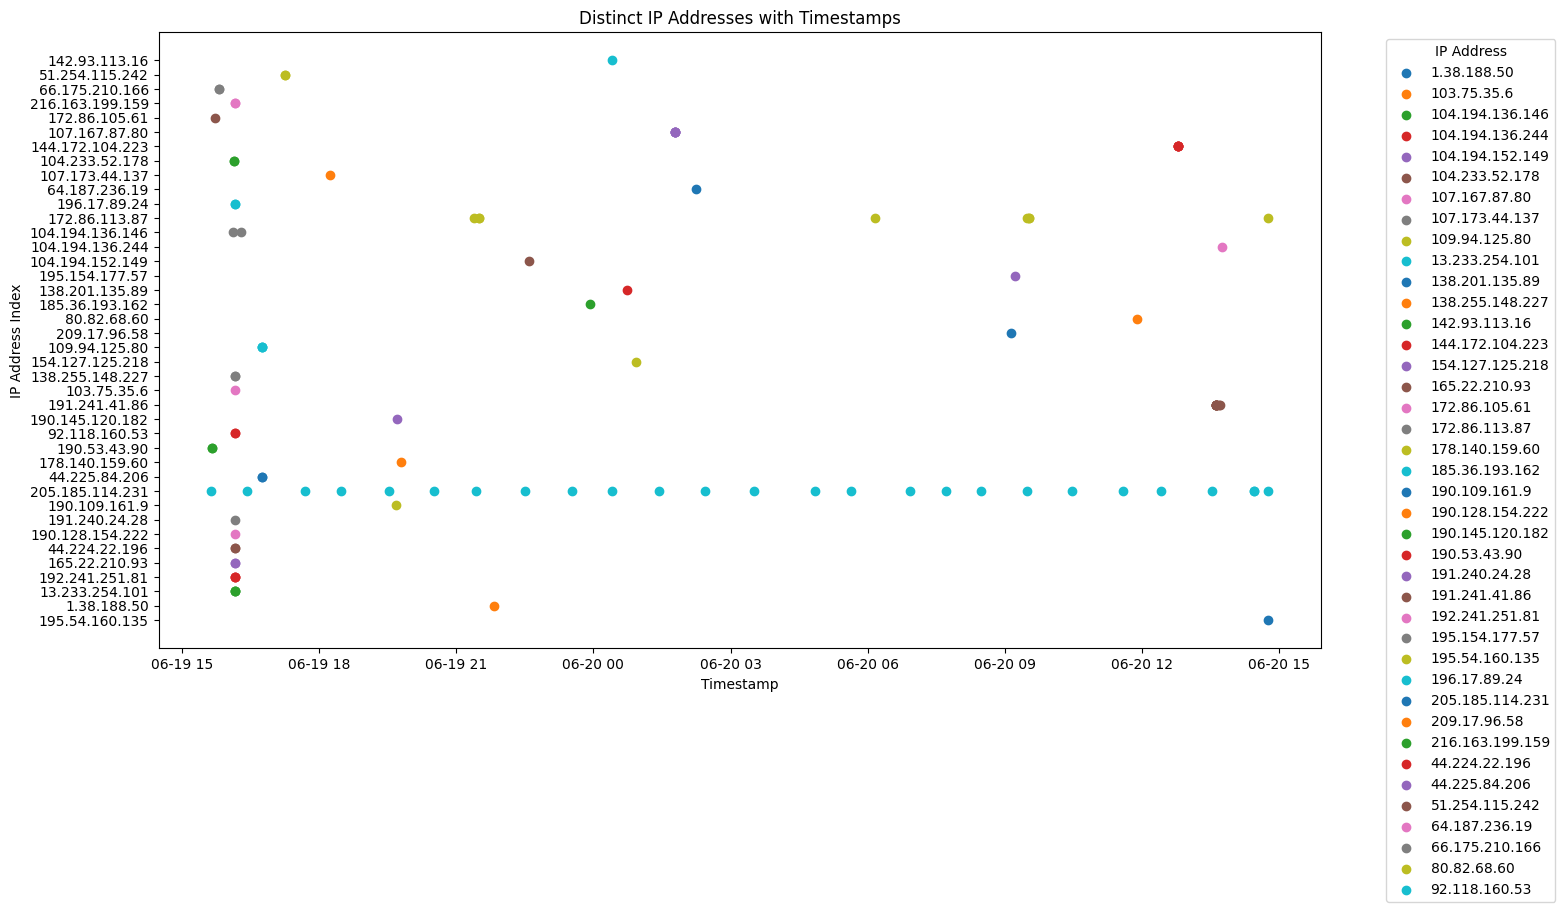

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df['@timestamp'] = pd.to_datetime(df['@timestamp'])
df['bytes'] = pd.to_numeric(df['bytes'], errors='coerce')

selected_features = ['bytes', 'response']
data = df[selected_features].dropna()

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data_normalized)

potential_attacks = data[data['cluster'] == 1] 
potential_ddos = df.loc[potential_attacks.index, ['clientip', '@timestamp']]
print(potential_ddos)
print(len(potential_ddos))

for ip, group in potential_ddos.groupby('clientip'):
    print(f"IP Address: {ip}")
    print("Timestamps:")
    for timestamp in group['@timestamp']:
        print(f"  - {timestamp}")
    print()
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(15, 8))
for i, (ip, group) in enumerate(potential_ddos.groupby('clientip')):
    plt.scatter(group['@timestamp'], [i]*len(group), label=ip)

plt.xlabel('Timestamp')
plt.ylabel('IP Address Index')
plt.title('Distinct IP Addresses with Timestamps')
plt.yticks(range(len(potential_ddos['clientip'].unique())), potential_ddos['clientip'].unique())
plt.legend(title='IP Address', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


              clientip          @timestamp
50      195.54.160.135 2020-06-20 14:45:21
118        1.38.188.50 2020-06-20 14:44:34
7311    192.241.251.81 2020-06-20 13:44:23
7553     165.22.210.93 2020-06-20 13:42:37
7915     165.22.210.93 2020-06-20 13:40:21
7916     165.22.210.93 2020-06-20 13:38:22
7917     165.22.210.93 2020-06-20 13:37:21
7918     165.22.210.93 2020-06-20 13:37:21
7931     165.22.210.93 2020-06-20 13:36:52
7932     165.22.210.93 2020-06-20 13:36:52
7936     165.22.210.93 2020-06-20 13:36:45
7938     165.22.210.93 2020-06-20 13:36:45
7939     165.22.210.93 2020-06-20 13:36:45
8077     44.224.22.196 2020-06-20 12:47:28
8079     44.224.22.196 2020-06-20 12:47:27
8080     44.224.22.196 2020-06-20 12:47:27
8081     44.224.22.196 2020-06-20 12:47:27
8082     44.224.22.196 2020-06-20 12:47:26
8429    195.54.160.135 2020-06-20 09:31:29
8431    195.54.160.135 2020-06-20 09:31:17
8434    195.54.160.135 2020-06-20 09:28:22
8756    195.54.160.135 2020-06-20 06:09:16
9080     44

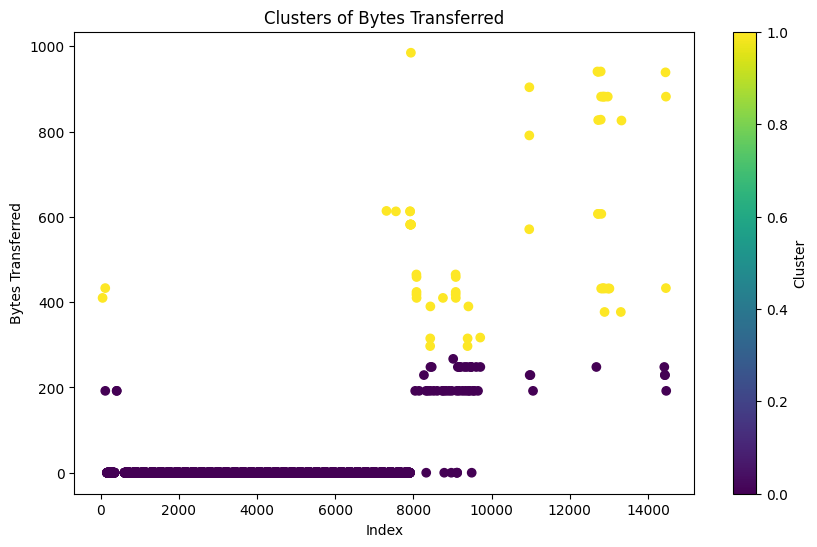

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df['@timestamp'] = pd.to_datetime(df['@timestamp'])
df['bytes'] = pd.to_numeric(df['bytes'], errors='coerce')


selected_features = ['bytes']
data_bytes = df[selected_features].dropna()


scaler = StandardScaler()
data_bytes_normalized = scaler.fit_transform(data_bytes)


data_timestamp = df[['@timestamp']]


kmeans_bytes = KMeans(n_clusters=2, random_state=42)
data_bytes['cluster'] = kmeans_bytes.fit_predict(data_bytes_normalized)


outliers_bytes = data_bytes[data_bytes['cluster'] == 1] 


potential_ddos = df.loc[outliers_bytes.index, ['clientip', '@timestamp']]
print(potential_ddos)
print(len(potential_ddos))
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(data_bytes.index, df.loc[data_bytes.index, 'bytes'], c=data_bytes['cluster'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Bytes Transferred')
plt.title('Clusters of Bytes Transferred')
plt.colorbar(label='Cluster')
plt.show()


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df['bytes'] = pd.to_numeric(df['bytes'], errors='coerce')
df['response'] = pd.to_numeric(df['response'], errors='coerce')


selected_features = ['bytes', 'response']
data = df[selected_features].dropna()


scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)


kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data_normalized)


potential_attacks = data[data['cluster'] == 1]  
print(potential_attacks)


       bytes  response  cluster
50     410.0     301.0        1
118    433.0     302.0        1
119    192.0     200.0        1
411    192.0     200.0        1
412    192.0     200.0        1
...      ...       ...      ...
14434  229.0     200.0        1
14449  939.0     302.0        1
14459  433.0     302.0        1
14460  882.0     200.0        1
14467  192.0     200.0        1

[107 rows x 3 columns]


C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


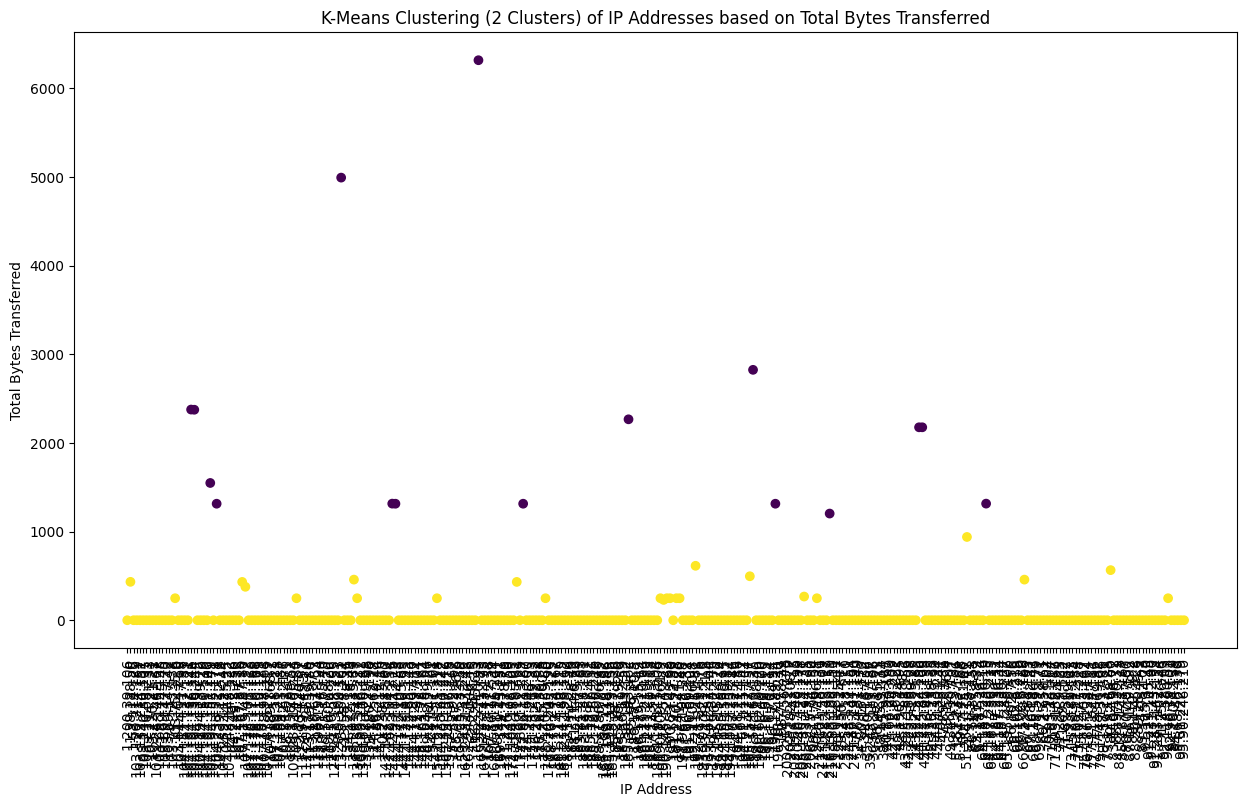

In [36]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ip_bytes = df.groupby('clientip')['bytes'].sum().reset_index()

kmeans = KMeans(n_clusters=2, random_state=42)
ip_bytes['cluster'] = kmeans.fit_predict(ip_bytes[['bytes']])


plt.figure(figsize=(15, 8))
plt.scatter(ip_bytes['clientip'], ip_bytes['bytes'], c=ip_bytes['cluster'], cmap='viridis')
plt.xlabel('IP Address')
plt.ylabel('Total Bytes Transferred')
plt.title('K-Means Clustering (2 Clusters) of IP Addresses based on Total Bytes Transferred')
plt.xticks(rotation=90)
plt.show()

C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


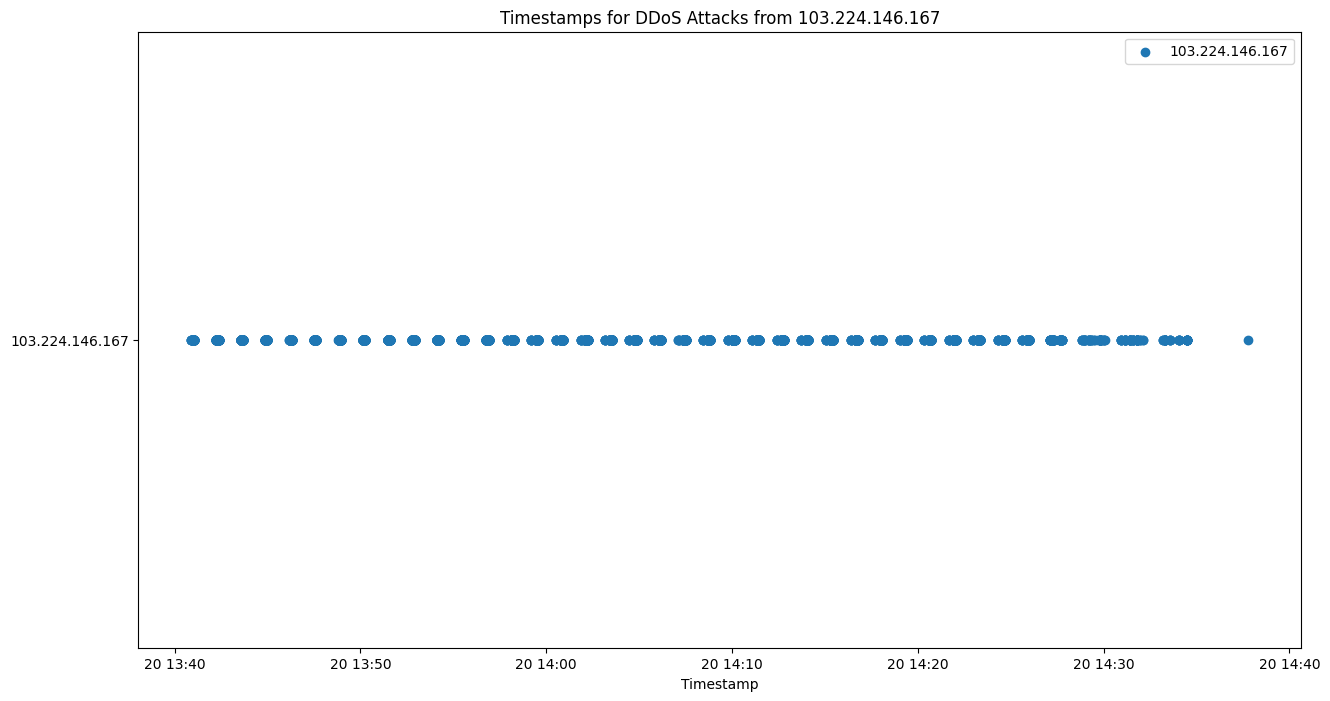

Ip address 103.224.146.167 may possess a potential DDoS attack


In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df['@timestamp'] = pd.to_datetime(df['@timestamp'])
df['bytes'] = pd.to_numeric(df['bytes'], errors='coerce')

selected_features = ['bytes']  
data = df[selected_features].dropna()

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)


kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data_normalized)

potential_attacks = data[data['cluster'] == 0] 


potential_ddos = df.loc[potential_attacks.index, ['clientip', '@timestamp']]


attack_counts = potential_ddos['clientip'].value_counts()


highest_ip = attack_counts.idxmax()


highest_ip_attacks = potential_ddos[potential_ddos['clientip'] == highest_ip]


plt.figure(figsize=(15, 8))
plt.scatter(highest_ip_attacks['@timestamp'], [1]*len(highest_ip_attacks), label=highest_ip)
plt.xlabel('Timestamp')
plt.yticks([1], [highest_ip])
plt.title(f'Timestamps for DDoS Attacks from {highest_ip}')
plt.legend()
plt.show()
print("Ip address", highest_ip,"may possess a potential DDoS attack")

